# Unsupervised Analysis of Days of Week

Treating crossings each day as features to learn about the relationships between various days

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt
plt.style.use("seaborn")

### Get Data

In [2]:
from Transportation_packages.data import get_fremont_data
data=get_fremont_data()

<IPython.core.display.Javascript object>


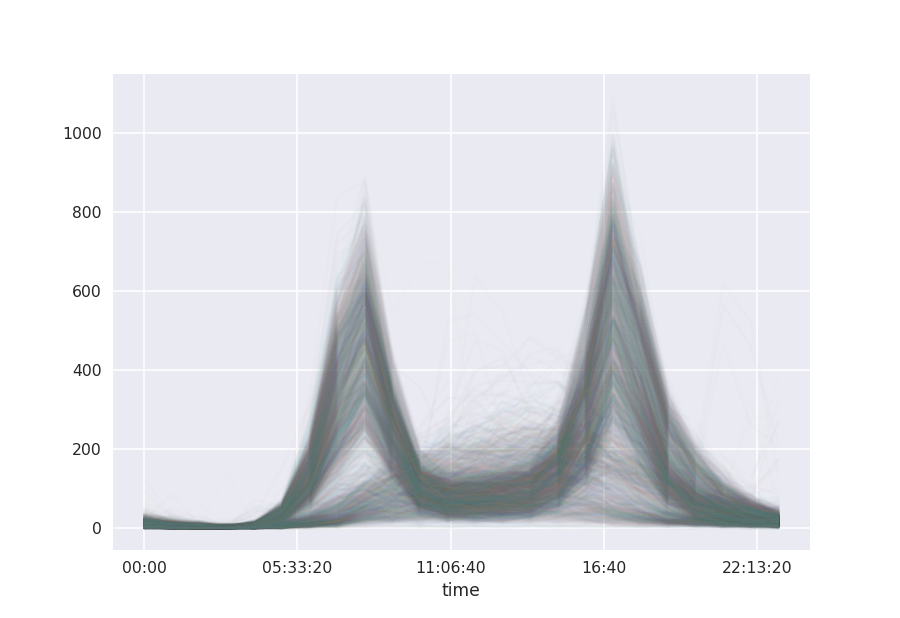

In [3]:
pivoted=data.pivot_table("Total",index=data.index.time,columns=data.index.date)
pivoted.plot(legend=False,alpha=0.015);

## Principal Component Analysis (PCA)

In [4]:
X=pivoted.fillna(0).T.values
X.shape

(2798, 24)

In [5]:
X2=PCA(n_components=2,svd_solver='full').fit_transform(X)
X2.shape

(2798, 2)

<IPython.core.display.Javascript object>


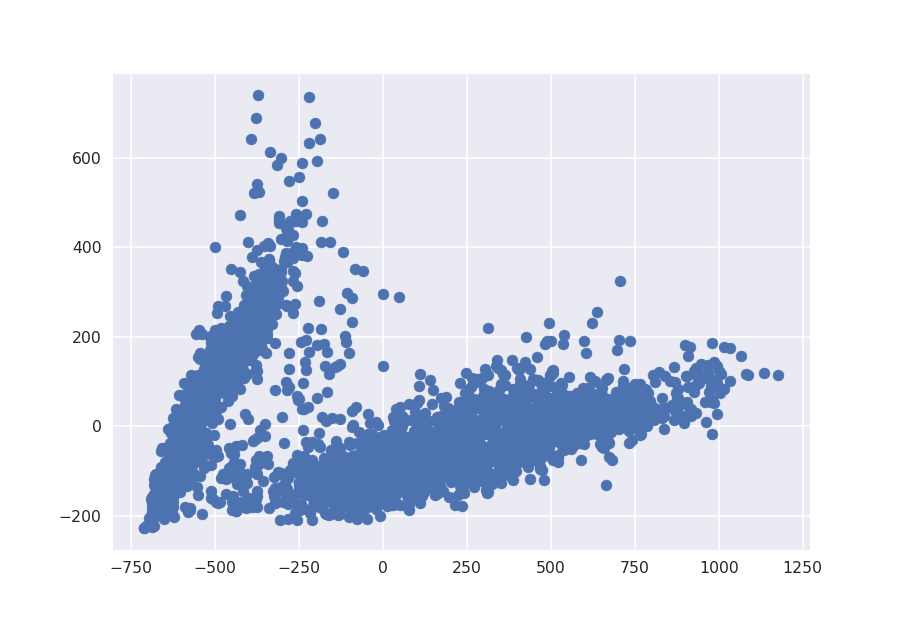

In [6]:
plt.figure()
plt.scatter(X2[:,0],X2[:,1]);

## Unsupervised Clustering

In [7]:
gmm=GaussianMixture(2)
gmm.fit(X)
labels=gmm.predict(X)
labels

array([1, 1, 1, ..., 0, 0, 0])

<IPython.core.display.Javascript object>


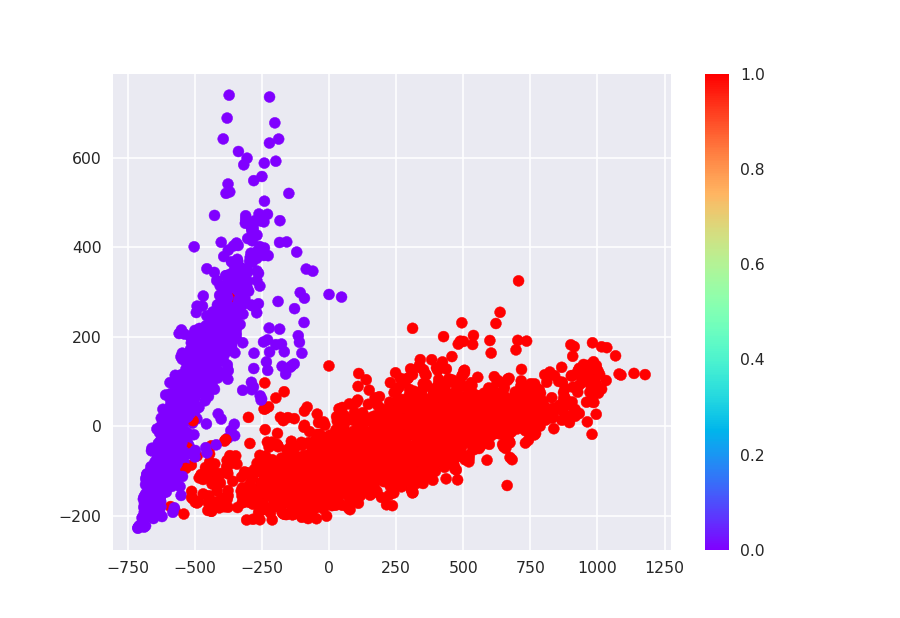

In [8]:
plt.figure()
plt.scatter(X2[:,0],X2[:,1],c=labels,cmap="rainbow");
plt.colorbar();

<IPython.core.display.Javascript object>


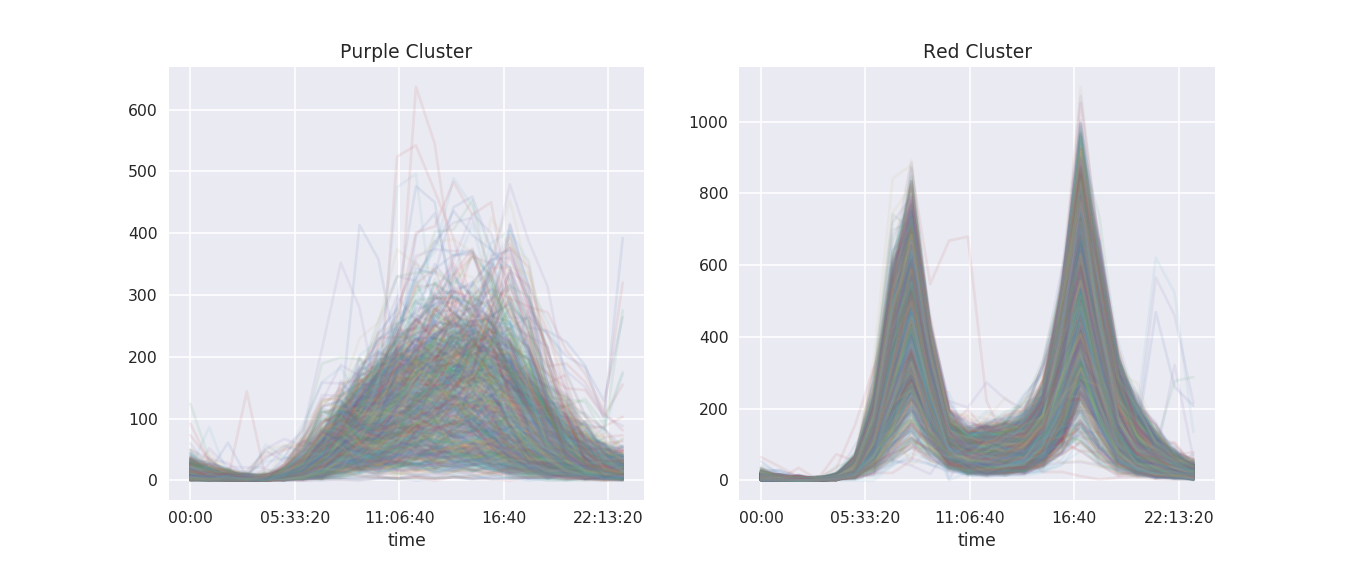

In [9]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
pivoted.T[labels==0].T.plot(legend=False,alpha=0.1,ax=ax[0]);
pivoted.T[labels==1].T.plot(legend=False,alpha=0.1,ax=ax[1]);

ax[0].set_title("Purple Cluster")
ax[1].set_title("Red Cluster");

## Comparing with Day of Week

In [10]:
dayofweek=pd.DatetimeIndex(pivoted.columns).dayofweek

<IPython.core.display.Javascript object>


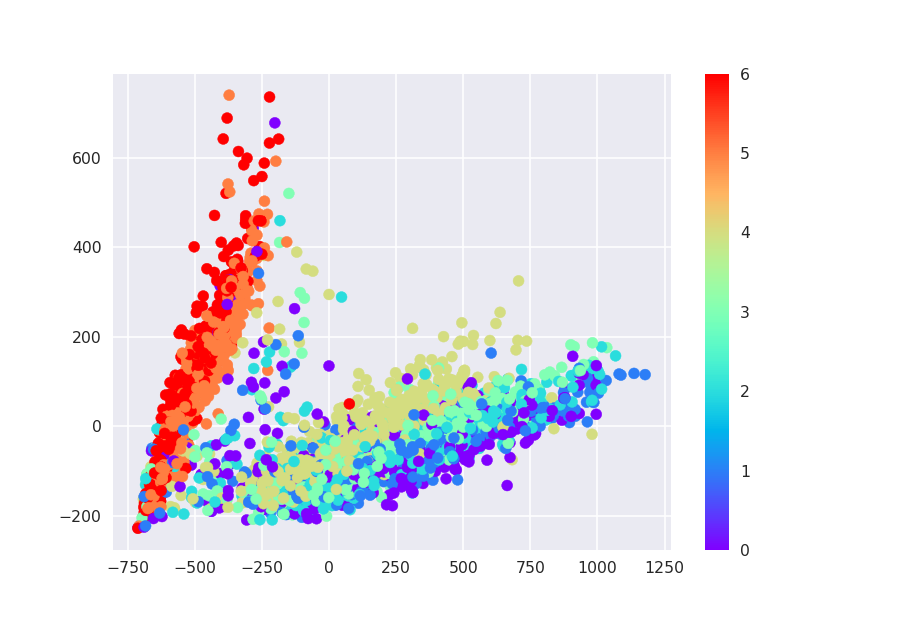

In [11]:
plt.figure()
plt.scatter(X2[:,0],X2[:,1],c=dayofweek,cmap="rainbow")
plt.colorbar()

## Analysing Outliers
The following points are weekdays with holiday-like pattern

In [12]:
dates=pd.DatetimeIndex(pivoted.columns)
dates[(labels==1) & (dayofweek<5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2020-03-05', '2020-03-06', '2020-03-09', '2020-03-10',
               '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-16',
               '2020-03-17', '2020-05-20'],
              dtype='datetime64[ns]', length=1873, freq=None)

In [13]:
len(dates[(labels==1) & (dayofweek<5)])

1873